<a href="https://colab.research.google.com/github/Sayan-ML/Spam-Classification/blob/main/sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('spam.csv' , encoding='ISO-8859-1')

In [3]:
df.shape

(5572, 5)

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.drop(df.iloc[:,2:5],axis=1,inplace=True)

In [6]:
df.rename({'v1':'Spam','v2':'Message'},axis=1,inplace=True)

In [7]:
df

,Spam,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
enc = LabelEncoder()

In [9]:
df.Spam=enc.fit_transform(df.Spam)

In [10]:
df

,Spam,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
df.isnull().sum()    # no missing values

,0
Spam,0
Message,0


In [12]:
df['Message'].duplicated().sum()

403

In [13]:
df.drop_duplicates(subset=['Message'],inplace=True)

In [14]:
df['Message'].duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

In [16]:
df[df.Spam==0].sample(500).index

Index([5101,  798, 4032, 4835, 2414, 1947, 4542, 2636, 1168, 2079,
       ...
       3589,  813, 4617, 4519, 3436, 5380, 1582,  754, 2875, 2136],
      dtype='int64', length=500)

In [17]:
df['Spam'].value_counts()  # imbalanced dataset

,count
Spam,
0,4516
1,653


<Axes: xlabel='Spam', ylabel='count'>

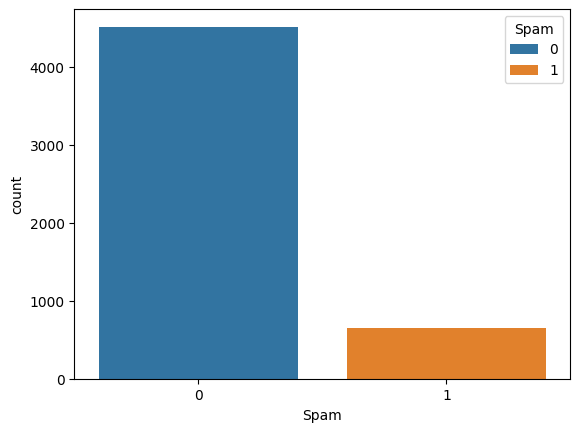

In [18]:
sns.countplot(df, x='Spam' , hue='Spam')

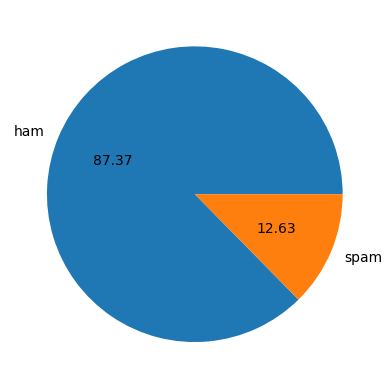

In [19]:
plt.pie(df['Spam'].value_counts(),labels=['ham','spam'], autopct='%0.2f');

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
df['num_characters']=df['Message'].apply(lambda x:len(x))

In [23]:
#df['re_Message']=df['Message'].str.findall(r'\w+') # basically we could do this as words means set of alphabets or number but acc to videos , they r using nltk which count the dots and punctuations also as word

In [24]:
#df['count_words']=df['re_Message'].apply(lambda x:len(x))

In [25]:
df['num_words']=df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df['num_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df

,Spam,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [28]:
df.iloc[:,[2,3,4]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df.iloc[:,[2,3,4]].columns

Index(['num_characters', 'num_words', 'num_sentences'], dtype='object')

In [30]:
df[df['Spam']==0][df.iloc[:,[2,3,4]].columns].describe()  # ham messages

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['Spam']==1][df.iloc[:,[2,3,4]].columns].describe()  # spam messages

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


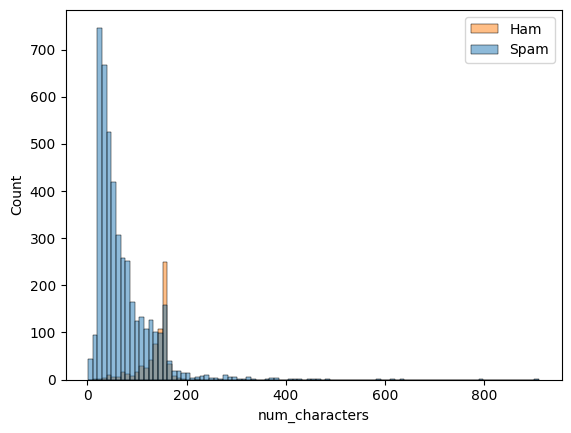

In [32]:
sns.histplot(df , x='num_characters',hue='Spam')
plt.legend(['Ham','Spam'],)

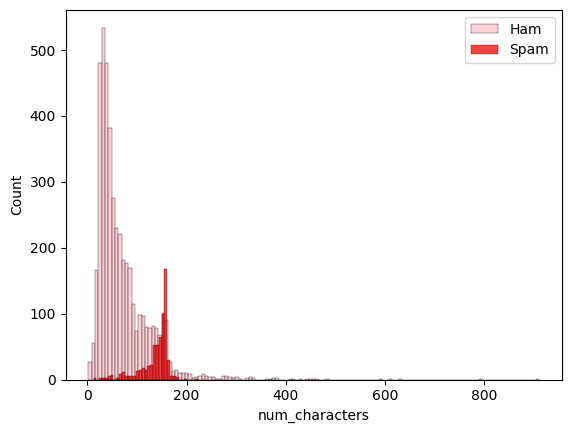

In [33]:
sns.histplot(df[df['Spam'] == 0]['num_characters'],color='pink' )
sns.histplot(df[df['Spam'] == 1]['num_characters'],color='r')
plt.legend(['Ham','Spam'])

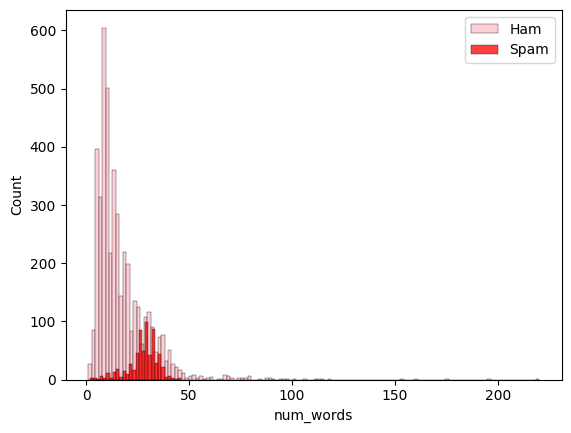

In [34]:
sns.histplot(df[df['Spam'] == 0]['num_words'],color='pink' )
sns.histplot(df[df['Spam'] == 1]['num_words'],color='r')
plt.legend(['Ham','Spam'])

In [35]:
# So we see the count of ham num_characters are higher due to imbalaced data as ham messages are higher but on average spam messages num of characters/no of words are higher than ham . though there r some outliers . we conclude that spam messages are mostly of more num char/num words than ham

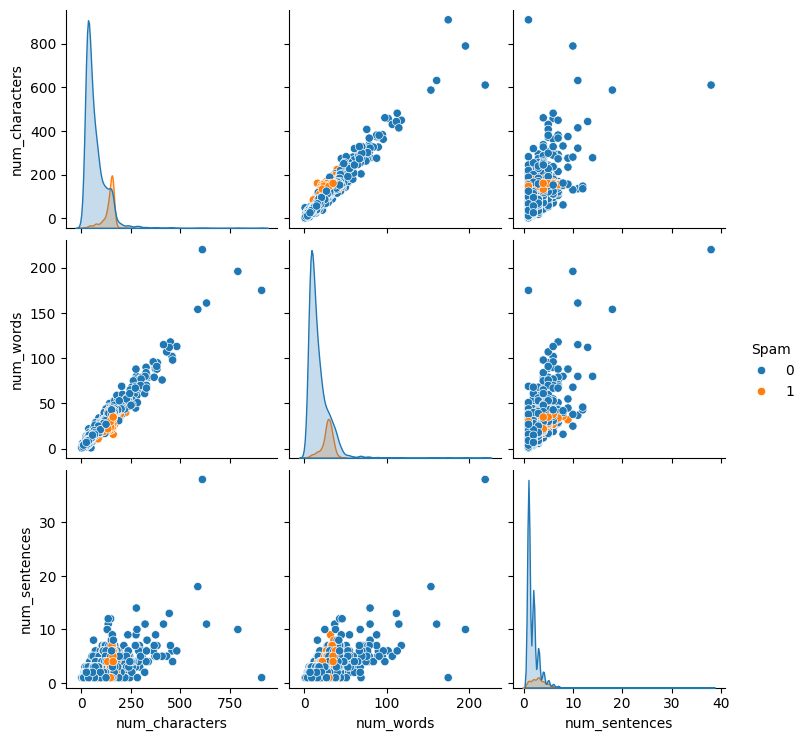

In [36]:
sns.pairplot(df ,hue='Spam')

<Axes: >

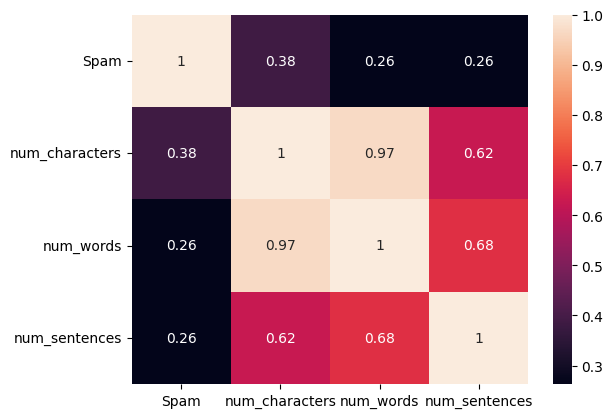

In [37]:
sns.heatmap(df.iloc[:,[0,2,3,4]].corr(), annot=True)

In [38]:
# we see that there is high correlation between num_char and num_words thrn num_words and num_sentence , so we basically take only 1 column and we take num_char as its more correlated with spam rather than other 2

In [49]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [50]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loving')

'love'

In [51]:
def transform_Text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
                y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [52]:
transform_Text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [53]:
df['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [54]:
df['transform_msg']= df['Message'].apply(transform_Text)

In [55]:
df.head(10)

,Spam,Message,num_characters,num_words,num_sentences,transform_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [56]:
!pip install wordcloud

In [57]:
from wordcloud import WordCloud

In [58]:
wc = WordCloud(width=700 , height =700 , min_font_size=10 , background_color='white')

In [59]:
spam_wc = wc.generate(df[df['Spam']==1]['transform_msg'].str.cat(sep=" "))

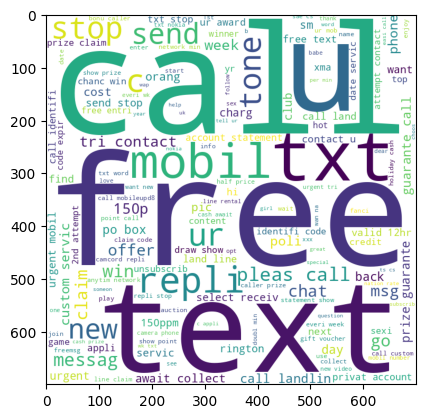

In [60]:
plt.imshow(spam_wc)

In [61]:
ham_wc = wc.generate(df[df['Spam']==0]['transform_msg'].str.cat(sep=" "))

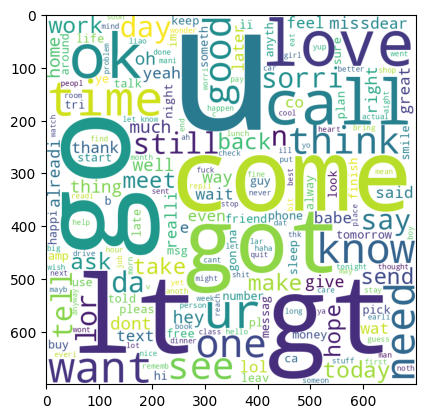

In [62]:
plt.imshow(ham_wc)

In [63]:
df

,Spam,Message,num_characters,num_words,num_sentences,transform_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [64]:
df['transformed_words'] = df['transform_msg'].apply(lambda x:nltk.word_tokenize(x))

In [65]:
spam_corpus = []
for msg in df[df['Spam']==1]['transformed_words']:
    for word in msg:
        spam_corpus.append(word)

In [66]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

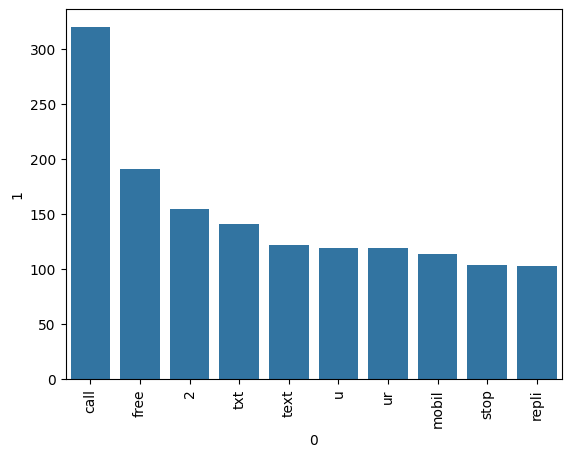

In [67]:
from collections import Counter
sns.barplot(y=pd.DataFrame(Counter(spam_corpus).most_common(10))[1], x=pd.DataFrame(Counter(spam_corpus).most_common(10))[0])
plt.xticks(rotation=90);

In [68]:
ham_corpus = []
for msg in df[df['Spam']==0]['transformed_words']:
    for word in msg:
        ham_corpus.append(word)

In [69]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

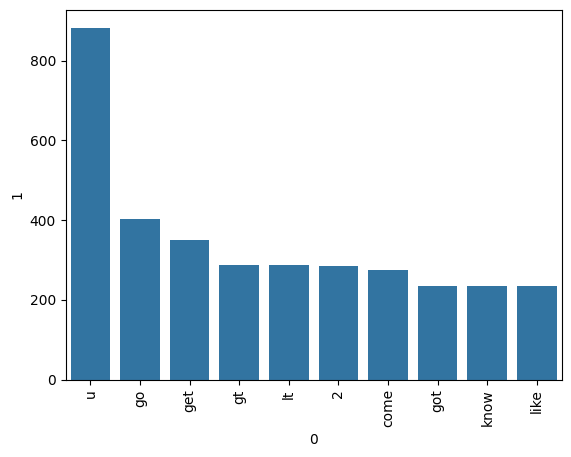

In [70]:
sns.barplot(y=pd.DataFrame(Counter(ham_corpus).most_common(10))[1], x=pd.DataFrame(Counter(ham_corpus).most_common(10))[0])
plt.xticks(rotation=90);

# Model Building

In [71]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [72]:
X = cv.fit_transform(df['transform_msg']).toarray()
xtfidf = tfidf.fit_transform(df['transform_msg']).toarray()

In [73]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()# we didnt use Standard scaler since naive bayes dont accept negative values
#X = scaler.fit_transform(X)  # we dont have any benefit by scaling so we emove it
#xtfidf = scaler.fit_transform(xtfidf)

In [74]:
X.shape

(5169, 6708)

In [75]:
y = df['Spam'].values

In [76]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [79]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score , precision_score

In [80]:
model = {'Gaussian NaiveBayes': GaussianNB(),
        'Multinomial NaiveBayes' : MultinomialNB(),
        'Bernoulli NaiveBayes' : BernoulliNB(),
        'Random Forest' : RandomForestClassifier(),
        'Decision Tree' : DecisionTreeClassifier(),
        'SVM': SVC(),
        'LogisticRegression':LogisticRegression(),
         'BaggingClassifier': BaggingClassifier(),
        'GradientBoosting' : GradientBoostingClassifier(),
        'ExtraTrees' : ExtraTreesClassifier(),
        'Xgboost' : XGBClassifier()}

In [81]:
acc_score=[]
prec_Score=[]
for i in range(0,len(list(model.values()))):
    list(model.values())[i].fit(X_train,y_train)
    print(list(model.keys())[i])
    print(accuracy_score(y_test , list(model.values())[i].predict(X_test)))
    acc_score.append(accuracy_score(y_test , list(model.values())[i].predict(X_test)))
    #print(classification_report(y_test , list(model.values())[i].predict(X_test)))
    prec_Score.append(precision_score(y_test , list(model.values())[i].predict(X_test)))

Gaussian NaiveBayes
0.8800773694390716
Multinomial NaiveBayes
0.9642166344294004
Bernoulli NaiveBayes
0.9700193423597679
Random Forest
0.9680851063829787
Decision Tree
0.9535783365570599
SVM
0.9709864603481625
LogisticRegression
0.9787234042553191
BaggingClassifier
0.9613152804642167
GradientBoosting
0.9593810444874274
ExtraTrees
0.97678916827853
Xgboost
0.97678916827853


In [82]:
# from here we see Logistic performs the best followed by SVM ,RF , binomialNaiveBayes
# but multinomialNB has better precision

In [83]:
perform_df = pd.DataFrame({'Algorithm':model.keys(),'Accuracy':acc_score ,'Precision': prec_Score})

In [84]:
perform_df.sort_values(by='Precision', ascending=False)

,Algorithm,Accuracy,Precision
6,LogisticRegression,0.978723,0.991525
5,SVM,0.970986,0.990909
9,ExtraTrees,0.976789,0.983051
3,Random Forest,0.968085,0.981651
2,Bernoulli NaiveBayes,0.970019,0.973451
10,Xgboost,0.976789,0.967213
8,GradientBoosting,0.959381,0.952830
7,BaggingClassifier,0.961315,0.945455
4,Decision Tree,0.953578,0.881356
1,Multinomial NaiveBayes,0.964217,0.834437


In [85]:
perform_df.sort_values(by='Precision', ascending=False)

,Algorithm,Accuracy,Precision
6,LogisticRegression,0.978723,0.991525
5,SVM,0.970986,0.990909
9,ExtraTrees,0.976789,0.983051
3,Random Forest,0.968085,0.981651
2,Bernoulli NaiveBayes,0.970019,0.973451
10,Xgboost,0.976789,0.967213
8,GradientBoosting,0.959381,0.952830
7,BaggingClassifier,0.961315,0.945455
4,Decision Tree,0.953578,0.881356
1,Multinomial NaiveBayes,0.964217,0.834437


In [86]:
perform_df1 = pd.melt(perform_df , id_vars='Algorithm')

In [87]:
perform_df1

,Algorithm,variable,value
0,Gaussian NaiveBayes,Accuracy,0.880077
1,Multinomial NaiveBayes,Accuracy,0.964217
2,Bernoulli NaiveBayes,Accuracy,0.970019
3,Random Forest,Accuracy,0.968085
4,Decision Tree,Accuracy,0.953578
5,SVM,Accuracy,0.970986
6,LogisticRegression,Accuracy,0.978723
7,BaggingClassifier,Accuracy,0.961315
8,GradientBoosting,Accuracy,0.959381
9,ExtraTrees,Accuracy,0.976789


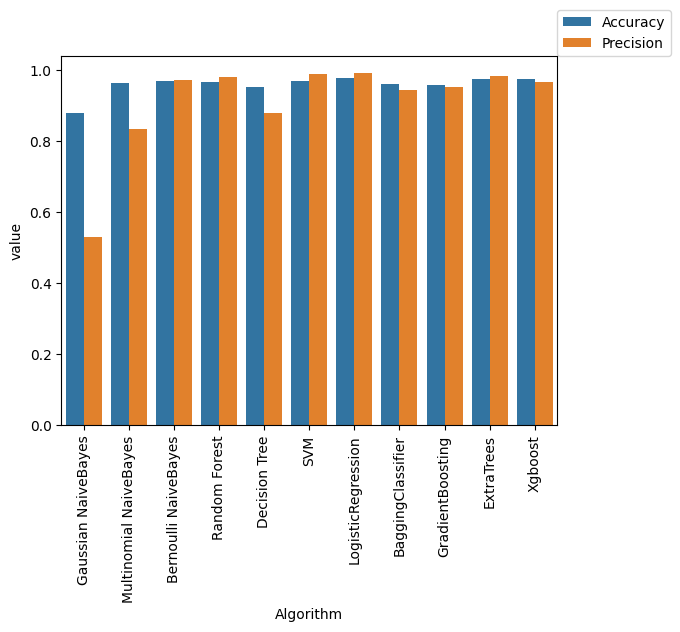

In [88]:
sns.barplot(perform_df1 , x='Algorithm' , y='value' , hue='variable')
plt.xticks(rotation=90)
plt.legend(loc=(1,1))

In [89]:
Xtf_train, Xtf_test, y_train, y_test = train_test_split(xtfidf, y, test_size=0.2, random_state=2)

In [90]:
acc_score=[]
prec_Score=[]
for i in range(0,len(list(model.values()))):
    list(model.values())[i].fit(Xtf_train,y_train)
    print(list(model.keys())[i])
    print(accuracy_score(y_test , list(model.values())[i].predict(Xtf_test)))
    acc_score.append(accuracy_score(y_test , list(model.values())[i].predict(Xtf_test)))
    print(classification_report(y_test , list(model.values())[i].predict(Xtf_test)))
    prec_Score.append(precision_score(y_test , list(model.values())[i].predict(Xtf_test)))

Gaussian NaiveBayes
0.8694390715667312
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       896
           1       0.51      0.80      0.62       138

    accuracy                           0.87      1034
   macro avg       0.74      0.84      0.77      1034
weighted avg       0.91      0.87      0.88      1034

Multinomial NaiveBayes
0.9709864603481625
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034

Bernoulli NaiveBayes
0.9835589941972921
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.88      0.93       138

    accuracy                           0.98      1034
   macr

In [91]:
perform_tfidf = pd.DataFrame({'Algorithm':model.keys(),'Accuracy':acc_score ,'Precision': prec_Score})

In [92]:
perform_tfidf.sort_values(by='Precision',ascending=False)

,Algorithm,Accuracy,Precision
1,Multinomial NaiveBayes,0.970986,1.000000
2,Bernoulli NaiveBayes,0.983559,0.991870
5,SVM,0.972921,0.982456
6,LogisticRegression,0.956480,0.979381
9,ExtraTrees,0.978723,0.975410
3,Random Forest,0.973888,0.974359
10,Xgboost,0.971954,0.943089
8,GradientBoosting,0.955513,0.925926
7,BaggingClassifier,0.955513,0.848485
4,Decision Tree,0.943907,0.781690


In [93]:
perform_df2 = pd.melt(perform_tfidf , id_vars='Algorithm')

In [94]:
perform_df.merge(perform_tfidf , on='Algorithm').sort_values(by=['Precision_y'],ascending=False)

,Algorithm,Accuracy_x,Precision_x,Accuracy_y,Precision_y
1,Multinomial NaiveBayes,0.964217,0.834437,0.970986,1.000000
2,Bernoulli NaiveBayes,0.970019,0.973451,0.983559,0.991870
5,SVM,0.970986,0.990909,0.972921,0.982456
6,LogisticRegression,0.978723,0.991525,0.956480,0.979381
9,ExtraTrees,0.976789,0.983051,0.978723,0.975410
3,Random Forest,0.968085,0.981651,0.973888,0.974359
10,Xgboost,0.976789,0.967213,0.971954,0.943089
8,GradientBoosting,0.959381,0.952830,0.955513,0.925926
7,BaggingClassifier,0.961315,0.945455,0.955513,0.848485
4,Decision Tree,0.953578,0.881356,0.943907,0.781690


In [95]:
from sklearn.ensemble import VotingClassifier
mnb = MultinomialNB()
etc = ExtraTreesClassifier()
rf = RandomForestClassifier()

In [96]:
voting = VotingClassifier(estimators=[('mnb',mnb),('etc',etc),('rf',rf)],voting='soft')

In [97]:
voting.fit(Xtf_train,y_train)

VotingClassifier(estimators=[('mnb', MultinomialNB()),
                             ('etc', ExtraTreesClassifier()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [98]:
 precision_score(y_test,voting.predict(Xtf_test))

1.0

In [99]:
accuracy_score(y_test,voting.predict(Xtf_test))

0.97678916827853

In [100]:
# stacking
from sklearn.ensemble import StackingClassifier
final_est = SVC()

In [101]:
scf = StackingClassifier(estimators=[('mnb',mnb),('etc',etc),('rf',rf)],final_estimator=final_est)

In [102]:
scf.fit(Xtf_train,y_train)

StackingClassifier(estimators=[('mnb', MultinomialNB()),
                               ('etc', ExtraTreesClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=SVC())

In [103]:
precision_score(y_test,scf.predict(Xtf_test)) # stacking works bad

0.9609375

In [104]:
# So we see that Votingclassifier worked better than MultinomialNB

In [105]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))


In [ ]:
# will try in streamlit tomorrow